In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
#setup API key
import os
OPENAI_API_KEY=os.getenv("OPENAI_API_KEY")

In [3]:
#Setting up the environmet key
os.environ["OPENAI_API_KEY"]=OPENAI_API_KEY

In [19]:
#Lets import the required libraries
import pandas as pd
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict, List   #
from langchain_core.tools import tool    #for creating Tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver   #To sustain the memory
from langgraph.prebuilt import ToolNode     #To create the Nodes for Tool

In [7]:
# Load the Groq chat model
from langchain_groq import ChatGroq
openai_model = ChatGroq(
    groq_api_key="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",  # Set your API key here or use env variable
    model_name="gemma2-9b-it",   # Groq's most capable model
)

In [45]:
#Load the model
from langchain_openai import ChatOpenAI
openai_model=ChatOpenAI(model="gpt-4o")

In [48]:
openai_model.invoke('Hi, My Name is Yaseen')

AIMessage(content='Hello Yaseen! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 15, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_76544d79cb', 'id': 'chatcmpl-BbvSOehQ3tbDfTs4qQRze3TM7tTDQ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--308db098-a14c-4e7c-9e67-8de6ff51780a-0', usage_metadata={'input_tokens': 15, 'output_tokens': 12, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [12]:
#We have our model ready, now lets create a Tool

In [49]:
#Load meeting data
@tool
def load_meeting_data() -> List[TypedDict]:
    """Tool to load meeting data from a CSV file."""
    df = pd.read_csv("yaseen_khan_missed_meetings_2.csv")
    meetings = df.to_dict(orient="records")
    return meetings

In [95]:
def load_meeting_data() -> List[TypedDict]:
    """Tool to load meeting data from a CSV file."""
    df = pd.read_csv("yaseen_khan_missed_meetings_2.csv")
    meetings = df.to_dict(orient="records")
    return meetings

In [106]:
data=load_meeting_data()
for i in data:
    print(i)

{'Meeting_ID': 'MTG0001', 'Title': 'Whiteboard Web-Enabled Roi', 'Date_Time': '4/27/2025 12:00', 'Duration': 15, 'Attendees': 'Yaseen Khan, Lauren Raymond, James Mccoy, Mrs. Amanda Barron, Kelsey Clayton, Jose Parker, Sarah Hall', 'Organizer': 'Tim Brown', 'Location/Link': 'Microsoft Teams', 'Meeting Type': 'Retrospective', 'Missed by User': True, 'Has MOM': True, 'Has Transcript': False, 'MOM Content': 'Meeting Summary:\nThe team reviewed the quarterly sales performance and discussed areas for improvement.\n\nAction Items:\n- Prepare detailed analytics report.\n- Escalate unresolved issues to the IT support.\n- Arrange a session on data compliance practices.', 'Transcript Content': nan, 'Recommended Action': nan}
{'Meeting_ID': 'MTG0002', 'Title': 'Deliver Frictionless E-Markets', 'Date_Time': '4/29/2025 15:00', 'Duration': 30, 'Attendees': 'Yaseen Khan, April Hancock, Meghan Mckinney, Ricardo Cole', 'Organizer': 'George Hawkins', 'Location/Link': 'Zoom', 'Meeting Type': 'Team Sync', 

In [109]:
data

[{'Meeting_ID': 'MTG0001',
  'Title': 'Whiteboard Web-Enabled Roi',
  'Date_Time': '4/27/2025 12:00',
  'Duration': 15,
  'Attendees': 'Yaseen Khan, Lauren Raymond, James Mccoy, Mrs. Amanda Barron, Kelsey Clayton, Jose Parker, Sarah Hall',
  'Organizer': 'Tim Brown',
  'Location/Link': 'Microsoft Teams',
  'Meeting Type': 'Retrospective',
  'Missed by User': True,
  'Has MOM': True,
  'Has Transcript': False,
  'MOM Content': 'Meeting Summary:\nThe team reviewed the quarterly sales performance and discussed areas for improvement.\n\nAction Items:\n- Prepare detailed analytics report.\n- Escalate unresolved issues to the IT support.\n- Arrange a session on data compliance practices.',
  'Transcript Content': nan,
  'Recommended Action': nan},
 {'Meeting_ID': 'MTG0002',
  'Title': 'Deliver Frictionless E-Markets',
  'Date_Time': '4/29/2025 15:00',
  'Duration': 30,
  'Attendees': 'Yaseen Khan, April Hancock, Meghan Mckinney, Ricardo Cole',
  'Organizer': 'George Hawkins',
  'Location/Lin

In [ ]:
#@tool
def analyze_meeting(meeting: TypedDict) -> str:
    """Analyzes MoM or Transcript from a meeting and returns a summary."""
    mom = meeting.get("MOMContent")
    print("Analyzing meeting:", mom)

In [132]:
analyze_meeting(data[1])

Analyzing meeting: 


In [51]:
#Defing the tool name as below
tools=[load_meeting_data]

In [52]:
#We are binding the tool
llm_with_tool=openai_model.bind_tools(tools)

In [86]:
response=llm_with_tool.invoke("My Name is Yaseen Khan")
response

AIMessage(content='Hello Yaseen Khan! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 57, 'total_tokens': 71, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_76544d79cb', 'id': 'chatcmpl-Bc8eQxdpUsaVgV2iHSQpWTDsSNSGt', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--2c65e627-c3a2-4ad7-aeed-ecea98f4cdaa-0', usage_metadata={'input_tokens': 57, 'output_tokens': 14, 'total_tokens': 71, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [81]:
response=llm_with_tool.invoke("can you load the meeting data?")
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wL4IyUNpBy5hUDQNOAJCsyy0', 'function': {'arguments': '{}', 'name': 'load_meeting_data'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 57, 'total_tokens': 69, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_76544d79cb', 'id': 'chatcmpl-BbvdZ1nUUGWstEdNUnPt1LxAARn8n', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8c164a00-e314-4029-8b5d-d7ae4a14d3aa-0', tool_calls=[{'name': 'load_meeting_data', 'args': {}, 'id': 'call_wL4IyUNpBy5hUDQNOAJCsyy0', 'type': 'tool_call'}], usage_metadata={'input_tokens': 57, 'output_tokens': 12, 'total_tokens': 69, 'input_token_details': {'audio': 0, 'cache_read': 0},

In [60]:
#Defining the supervisor node as our llm
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)  #instead of invoking the normal llm , we are using the binding llm which is binded to a tool
    return {"messages":[response]}

In [69]:
#lets ask a simpe query
input={'messages': ['load the outlook data']}  #quer
response=call_model(input)  #call the function with query and store the resul in response variable
message=response["messages"]  #Take only messages from response
last_message=message[-1]  #Take the last message from all the messages
last_message

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4gWX83B49WVFQcBrcHt3Y1ra', 'function': {'arguments': '{}', 'name': 'load_meeting_data'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 54, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_76544d79cb', 'id': 'chatcmpl-BbvZQJiBTmVIIhKhmbuRpHeP22KfS', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--aa2e85c2-215d-43e9-9fd6-77413702bab5-0', tool_calls=[{'name': 'load_meeting_data', 'args': {}, 'id': 'call_4gWX83B49WVFQcBrcHt3Y1ra', 'type': 'tool_call'}], usage_metadata={'input_tokens': 54, 'output_tokens': 12, 'total_tokens': 66, 'input_token_details': {'audio': 0, 'cache_read': 0},

In [61]:
tools

[<function __main__.load_meeting_data() -> List[TypedDict]>]

In [62]:
#Note: we have to create this tool as node for orchaestration pupose
# for this tool to consume it as node inside our workflow, we have use this method below
tool_node=ToolNode(tools)

#now this "tool_node" variable is the node of our tool which can be used in orchaestrtion

In [63]:
#Lets define a router and orchaestrate the workflow
def router_function(state: MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [70]:
#Lets create the workflow with this router
workflow=StateGraph(MessagesState)

In [71]:
#create the nodes
workflow.add_node("assistant",call_model)
workflow.add_node("loadoutlook_data",tool_node)  #Consuming tool as node

In [ ]:
#Define the endges (conditional edges )
workflow.add_edge(START, "assistant")

workflow.add_conditional_edges("assistant",
                               router_function,
                               {"tools": "loadoutlook_data", END: END})


In [84]:
#Lets compile
app = workflow.compile()

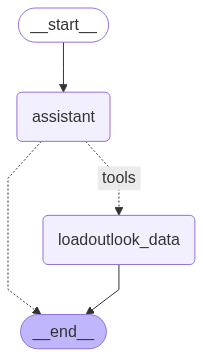

In [85]:
#Lets visualize the graph
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [87]:
#Now lets invoke this app

#invoking with a simple message
response=app.invoke({"messages": ["Hi, My Name is Yaseen Khan"]})
response

#Here we are getting the AI message from LLM (assistant) directly as this is simple query

{'messages': [HumanMessage(content='Hi, My Name is Yaseen Khan', additional_kwargs={}, response_metadata={}, id='3ed6f62f-dd28-46b5-88ac-c0daff0b9199'),
  AIMessage(content='Hello, Yaseen Khan! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 59, 'total_tokens': 74, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_76544d79cb', 'id': 'chatcmpl-Bc8ik3a06cHSNGS2J3YADmz4YKBJI', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c1355910-7880-40db-85c8-3b9b9a502607-0', usage_metadata={'input_tokens': 59, 'output_tokens': 15, 'total_tokens': 74, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [79]:
#Now lets invoke this app

#invoking with a simple message
response=app.invoke({"messages": ["please load the meeting data"]})
response

#Here we are getting the AI message from LLM (assistant) directly as this is simple query

{'messages': [HumanMessage(content='please load the meeting data', additional_kwargs={}, response_metadata={}, id='56afda14-ef87-4a2f-87a6-0507063064f0'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Wbunh3OndsXPaxG3KThYYXLa', 'function': {'arguments': '{}', 'name': 'load_meeting_data'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 55, 'total_tokens': 67, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_76544d79cb', 'id': 'chatcmpl-BbvcoxrfVvpK5mg9ac07I4vMKFh1g', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f75fc3c7-892d-4231-a0f1-2e1a60d99c9e-0', tool_calls=[{'name': 'load_meeting_data', 'args': {}, 'id': 'call_Wbunh3OndsXPaxG3KThYYXL